# Detecting Cardiac Arrhythmias

### Training a deep neural network on ECG signals to detect cardiac arrhythmias.

##### Written by Chance Alvarado: [LinkedIn](https://www.linkedin.com/in/chance-alvarado/), [GitHub](https://github.com/chance-alvarado/)

##### Explore the full repository [here](https://github.com/chance-alvarado/arrhythmia-detector).

<img src='resources/images/heart_graphic.jpg' />

Image courtesy of [Pixabay](https://pixabay.com/).


---

## Table of Contents

- [Introduction](#intro)
    - [What is a Cardiac Arrhythmia?](#i1)
    - [What is an ECG?](#i2)
    - [Analysis Goals](#i3)
- [Setup and Data Overview](#s1)
    - [Imports](#s11)
    - [Overview of Training and Testing Data](#s12)
    - [Target Notation](#s13)
    - [Previewing the Data](#s14)
    - [Breakdown of Classes for Training Data](#s15)
- [Signal Visualization](#s2)
    - [Visualizing ECG Signal of a Normal Heartbeat ](#s21)
    - [Visualizing ECG Signal of a Supraventricular Premature Beat ](#s22)
    - [Visualizing ECG Signal of a Premature Ventricular Contraction ](#s23)
    - [Visualizing ECG Signal of the Fusion of a Ventricular and Normal Beat](#s24)
    - [Visualizing ECG Signals of an Unclassifiable Beat](#s25)
    - [Trends in ECG Signals for Varying Types of Arrhythmias](#s26)
- [Model Construction](#s3)
    - [Data Preparation](#s31)
    - [Training the Neural Network and Tuning Hyperparameters](#s32)
    - [Preparing the Testing Data](#s33)
    - [Making Predictions](#s34)
- [Conclusions](#conclusions)
    - [Findings](#findings)
    - [Limitations](#limitations)
    - [Further Research](#further)

<a id="intro"></a>

## Introduction

<a id="i1"></a>

### What is a Cardiac Arrhythmia?

Cardiac arrhythmias occur when the electrical impulses of the heart don't function properly. This can cause your heart to beat too quick, too slow, or beat irregularly. For some this may feel like a fluttering or pain in the chest. Arrhythmias may also manifest as anxiety, fatigue, sweating, dizziness, or fainting.
<br/><br/>
The causes of arrhythmias varies greatly. These can range from smoking, drinking, and genetics to heat attacks, high blood pressure, and diabetes. Certain types of arrhythmias may put one at higher risk of serious medical conditions such as stroke and heart failure.
<br/><br/>
Preventing cardiac arrhythmias often involves adopting a heart-healthy lifestyle. This includes:

- Eating a heart-healthy diet
- Staying active and maintaining a healthy weight
- Limiting caffeine and alcohol
- Reducing stress
- Carefully using certain over-the-counter medicines that can trigger arrhythmias
<br/><br/>

Information above retrieved from [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/heart-arrhythmia/symptoms-causes/syc-20350668).

<a id="i2"></a>

### What is an ECG?

An electrocardiogram (ECG or EKG) measures the the electrical activity of the heart. A normal heartbeat presents certain notable features in the ECG signal:

- The left and right atria make the first wave, the P-wave.
- The left and right bottom chambers make the following wave, the QRS complex.
- Finally, the electrical recovery back to a resting state creates the final wave, the T-wave. 
<br/><br/>

ECGs give medical professionals indespinsable knowledge about the function of the heart. They show the speed and regularity of the electrical activity of the heart. They may also indicate abmormalities in the features of the heart.

Information above retrieved from [American Heart Association](https://www.heart.org/en/health-topics/heart-attack/diagnosing-a-heart-attack/electrocardiogram-ecg-or-ekg).


##### Typical Sinus Rhythm Produced from an ECG

<img src='resources/images/ecg.jpg' width="400" height="20"/>

Image courtesy of [Wikipedia](https://commons.wikimedia.org/w/index.php?curid=1560893).

<a id="i3"></a>

### Analysis Goals

The goal of this analysis is to train a deep neural network to accurately detect cardiac arrhythmias from an ECG signal representing a single heartbeat. This model should be able to properly differentiate between a normal heartbeat and four common types of arrhythmias.


---

<a id="s1"></a>

## Setup and Data Overview


<a id="s11"></a>

### Imports

The code responsible for this analysis has been refactored and split among multiple scripts found in the `resources/scripts` directory. We will primarily be using functions and classes from `arrhythmia_analysis.py`.

- Further explanation on the methods used in this analysis can be found in these scripts.
- Feel free to modify and adapt any part of these modules for your projects!

In [1]:
from resources.scripts import arrhythmia_analysis

DataProcessing = arrhythmia_analysis.DataProcessing()
ModelEvaluation = arrhythmia_analysis.ModelEvaluation()

<a id="s12"></a>

### Overview of Training and Testing Data

Data necessary for this analysis is divided among two csv files and can be found in the `resources/data` directory:

- `mitbih_train`
    - This dataset contains 87553 ECG signals of a single heartbeat measured at 187 instances. Each instance notes the signal's normalized amplitude ranging between 0 and 1. The signal's respective arrhythmia type is also noted.
    - Modified data from this dataset will be used to train and validate our neural network.
- `mitbih_test`
    - This dataset contains 21891 instances of ECG signals in the same fashion as `mitbih_train`.
    - Data from this dataset will be used to validate the accuracy of our neural network.
    
Acknowledgements to the rights holders can be found in this project's [README](https://github.com/chance-alvarado/arrhythmia-detector/blob/master/README.md).

<a id="s13"></a>

### Target Notation

Our data represents varying arrhythmia types as integers ranging from 0 to 4. These values correspond to the American Heart Association's standard heartbeat notation. The standard notation and full name are as follows:

- 0: **N**
    - Normal heartbeat
- 1: **S**
    - Supraventricular premature beat
- 2: **V**
    - Premature ventricular contraction
- 3: **F**
    - Fusion of ventricular and normal beat
- 4: **Q**
    - Unclassifiable beat

For consistency, we will mostly refer to the arrhythmia types by their integer value in plots and graphics.

<a id="s14"></a>

### Previewing the Data

To get a better feel of the raw data we will be working with, we will first observe a sample DataFrames built on `mitbih_test`.

##### Relevant paths to data

In [2]:
test_dir = 'resources/data/mitbih_test.csv'

##### Import a sample of the testing dataset and preview

In [4]:
arrhythmia_analysis.sample_dataframe(test_dir).head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0,0,0,0,0,0,0,0,0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0,0,0,0,0,0,0,0,0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0,0,0,0,0,0,0,0,0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0,0,0,0,0,0,0,0,0,0


##### Discussion

Our raw data's first 187 columns represent the ECG signal in question. The last column specifies the arrhythmia type in question. In this instance, our last columns are all 0s, representing normal heartbeats. We can also note many trailing zeros; this likely represents a heartbeat that concluded before the end of the standardized time duration.  

<a id="s15"></a>

### Breakdown of Classes for our Training Data

Let us further analyze the density of each arrhythmia type in our eventual training data. To do so, we will plot the count of each arrhythmia as a bar graph.

<img src='resources/plots/class_bar.jpg' />

##### Discussion

From this visualization we note a *severe* class imbalance. The vast majority of our data represents normal heartbeats with vary types of arrhythmias paling in comparison. This will need to be addressed later before we begin to train our model - possibly through over or under-sampling.


---

<a id="s2"></a>

## Signal Visualization

For details on how these and other visualizations were created please see `resources/scripts/visualization_creation.py`.

<a id="s21"></a>

### Visualizing ECG Signal of a Normal Heartbeat 

<img src='resources/plots/ecg_signal_0.gif' />

##### Discussion

The ECG signal for our normal heartbeat is relatively unremarkable. We are able to pick out some of the basic structures of the signal (notably the QRS complex). We also note the beat concludes about halfway through the time interval.

<a id="s22"></a>

### Visualizing ECG Signal of a Supraventricular Premature Beat 

<img src='resources/plots/ecg_signal_1.gif' />

##### Discussion

In this signal of a superventricular prematures beat we notes an abnormal P-wave. This is common this this type of arrhythmia. This type of arrhythmia also usually shows as a wider QRS complex but that is not imeediately obvious in this signal.

<a id="s23"></a>

### Visualizing ECG Signal of a Premature Ventricular Contraction 

<img src='resources/plots/ecg_signal_2.gif' />

##### Discussion

For a premature ventricular contraction there is often a large 'dip' in the signal. We can assume that this correlates to the low signal start and higher than average active signal before quickly dropping back to 0.

<a id="s24"></a>

### Visualizing ECG Signal of the Fusion of a Ventricular and Normal Beat 

<img src='resources/plots/ecg_signal_3.gif' />

##### Discussion

To an untrained eye there is not much strikingly different from our example of a normal heartbeat. This makes sense based on the 'fusion' aspect of the arrhythmia. We will have to wait and see if our model is able to pick up on the subtle differences in the signals.

<a id="s25"></a>

### Visualizing ECG Signal of an Unclassifiable Beat 

<img src='resources/plots/ecg_signal_4.gif' />

##### Discussion

This signal looks much different than our previous signals. Finding a trend in irregular and unclassifiable beats may be dificult as this label acts as sort of a catch-all for irregular heart beats.

<a id="s26"></a>

### Trends in ECG Signals for Varying Types of Arrhythmias

To conclude our initial data exploration we will attempt to note any general trends in the signals of each arrhythmia type. We will plot 100 of each type of arrhythmia as a scatter plot of rounded amplitude versus time and overlap them.


<img src='resources/plots/ecg_scatter.jpg' />

##### Discussion

- Arrhythmia Type 0:
    - The signals of our normal heartbeats are suprisignly irregular. We do note that the bulk of our data is concentrated in the lower amplitude range.
- Arrhythmia Type 1:
    - Our visualization clearly highlight the elevated P-wave present in this type of arrhythmia. We also note signals not falling to zero as readily as in other arrhythmia types.
- Arrhythmia Type 2:
    - We note the telltale 'dip' for this type of arrhythmia clearly. However we can note that many signals in this form do not have this feature as evident. This may be difficult for our model to generalize.
- Arrhythmia Type 3: 
    - The scatter plot of the fusion of a ventricular and normal beat perhaps has the most notable consistent form of all arrhythmias analyzed. These heartbeats seems quick with notable peaks.

- Arrhythmia Type 4: 
    - We note that most of the visualized signals in this plots fall to 0 at around the same time. We are able to note a relatively distinct average upper bound on our signals as well. The pattern for 'unclassifiable' heartbeats is suprisignly consistent.


---

<a id="s3"></a>

## Model Construction

<a id="s31"></a>

### Data Preperation

Before we begin training our model we will need to process our data to enhance the training process. The following processing techniques will be applied to our test data:

- Under-sample our overrepresented class, the normal heartbeat. We will randomly select 20000 signals from this class. 
<br/><br/>
- Over-sample our underrepresnted clases, all forms of arrhythmias. We will randomly duplicate signals so we have 20000 signals from each class. This leads to a total training dataset of 100000 signals and their targets.
<br/><br/>
- Randomly shuffle the rows of the DataFrame holding our training data so our model cannot learn from the order of the signals. 
<br/><br/>
- Add noise to the signals. We will add random uniform noise to every signal. This will ensure that each signal our model trains on is unique in hopes of preventing overfitting.
<br/><br/>
- Split our DataFrame into a feature matrix of the ECG signals and a target vector of their respective arrhythmia types.
<br/><br/>
- One-hot encode our target vector. This changes our one-column vector to a binary matrix of five columns.

To find more about the specifics of preparing our test data please see `model_training.py` and `arrhythmia_analysis.py` found in `resources/scripts`.

##### Raw Signal

<img src='resources/plots/ecg_no_noise.jpg' />

##### Same Signal with Random Noise Added

<img src='resources/plots/ecg_noise.jpg' />

##### One-hot Encoding our target vector

$$\begin{bmatrix} 0 \\ 1 \\ 2 \\ 3 \\ 4 \\ \vdots \end{bmatrix} \rightarrow \begin{bmatrix} 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ \vdots&\vdots&\vdots&\vdots&\vdots\end{bmatrix}$$

<a id="s32"></a>

### Training our Neural Network and Tuning Hyperparameters

Now that we have a robust amount of processed data we can begin to build and train our deep neural network. We will do this through TensorFlow's Keras library.

##### Structure of the Network

Our deep neural network will follow the following general architecture

- A dense layer using the rectified linear unit (ReLU) activation function
- A dropout layer 
- Another dense layer using the ReLu activation function
- A final dropout layer
- An output layer of five nodes using the softmax activation function.

##### Parameter Selection

To identify the optimal architecture of our model we will test the following hyperparamters:

- Weight sequence of our hidden layers:
    - 128, 96
    - 128, 128
    - 216, 128
- First dropout layer rate:
    - 0
    - 0.25
    - 0.5
- Second dropout layer rate:
    - 0
    - 0.25
    - 0.5

Since we are exhaustively testing these hyperparameters, we will be building and evaluating a total of 27 models and selecting the one that performs best on our validation data.

##### Training Process

The training of our model will follow the following process:

- Select a combination of testing hyperparameters
- Build a model with the specified layer units and dropout rates
- Train our model until accuracy on our validation set no longer increases
- Store the model metrics and repeat testing with the next set of hyperparameters
- Rebuild the model with the optimized hyperparameters (based on validation accuracy) and train for 100 epochs.

##### Import the best model found from `resources/scripts/model_training.py`

In [5]:
model = ModelEvaluation.import_best_model()

##### Inspect the optimized hyperparameters for our model

In [6]:
ModelEvaluation.best_parameters(model)

Input Layer Nodes: 187
Dense Layer Nodes: 216
Dropout Rate: 0
Dense Layer Nodes: 128
Dropout Rate: 0
Dense Layer Nodes: 5


##### Visualize our Model's Architecture

<img src='resources/plots/model_architecture.png' />

#### Change in Validation Accuracy and Loss during Training with Optimized Hyperparamters

<img src='resources/plots/model_training.jpg' />

##### Discussion

We note that with our optimized hyperparameters our deep neural network quickly approaches an accuracy in the upper 90s on the validation set. After a quick drop-off the loss on our validation set steadily begins to rise.

<a id="s33"></a>

### Preparing our Testing Data

Now that we have a deep neural network with optimized hyperparamters we can test its accuracy on our testing data. Before this, though, we will need to process our testing data into a form consistent with our training data.

##### Construct DataFrame of test data

In [7]:
df_test = arrhythmia_analysis.create_dataframe(test_dir)

##### Split our data into a feature matrix and target vector

In [8]:
feature_mat_test, target_vect_test = DataProcessing.feature_target_split(df_test)

##### One hot encode our target vector to match training samples

In [9]:
target_vect_test_enc = DataProcessing.one_hot_encoder(target_vect_test)

<a id="s34"></a>

### Making Predictions

Next, we will allow our deep neural network to make predictions on the 21891 signals present in our testing data.

**Note:** Due to the ineherently stochastic process of machine learning results may vary slightly from run to run.

##### Make predictions on our test data

In [10]:
ModelEvaluation.evaluate_model(model, feature_mat_test, target_vect_test_enc)

Accuracy on testing data:  0.9544582366943359


##### Create and display the confusion matrix for our optimized model

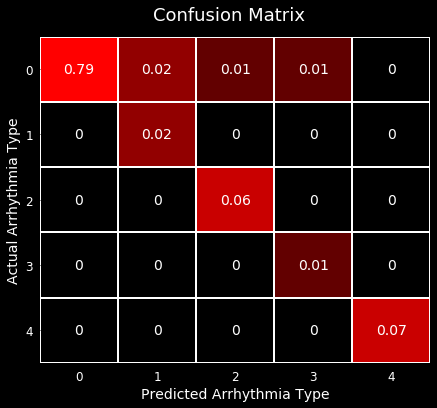

In [11]:
ModelEvaluation.plot_confusion_matrix(model, feature_mat_test, target_vect_test)

##### Discussion

Our optimized deep neural network returned an accuracy on our test data of ~95%. From our confusion matrix we note that the statistically significant majority our false predictions involve classifying the signal of a normal heartbeat as an arrhythmia. In terms of medical diagnostics, this is certainly better than letting a serious arrhythmia go undetected. We also note that our model failed to learn any notable patterns on type 1 arrhythmias - supraventricular premature beats.


---

<a id="conclusions"></a>

## Conclusions


<a id="findings"></a>

### Findings

After training our optimized deep neural network on 100000 ECG signals we were able to make accurate predictions on ~95% of our testing data. Of the incorrect prediction, the statistically significant ones were where our model classified a regular signal as that of one signifying an arrhythmia. As mentioned prior, this is certainly better than letting a serious arrhythmia go undetected. A more balanced testing dataset could yield different results, though.

<a id="limitations"></a>

### Limitations

Perhaps the most evident limitation to our data is the severe class imbalance. A higher amount of authentic training data for the underrepresented arrhythmia types could have helped our model accurately predict these on our testing data. Though this was attempted to be combated by resampling and adding noise to our signals, this does not make up to high-quality authentic data.  Modifying the number of epochs our final model trained for could possible increase performance as well. Minimal computing power prevents a a more exhaustive hyperparamter search from being completed; it is likely that a different combination of layers, nodes, and evaluation techniques would yield better performance.

<a id="further"></a>

### Further Research

Different types of neural networks could yield higher accuracies. For example, [Gregoire DC](https://www.kaggle.com/gregoiredc)'s model hosted on [Kaggle](https://www.kaggle.com/gregoiredc/arrhythmia-on-ecg-classification-using-cnn) achieved a high level of accuracy using a convolutional neural network (CNN). A long short term memory network (LSTM) have been shown to provide high accuracy on temporal and signal data such as our ECGs.

---
